# Importing library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 21)
plt.style.use('ggplot')

# Importing Data

In [4]:
df = pd.read_csv('Assignment.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
  df.info()
  print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# Data Cleaning

In [9]:
pd.set_option('display.max_columns', 21)
plt.style.use('ggplot')
df.head()

df.info()
print(df.shape)
df.columns
df.dtypes
df.describe().T

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check the data type again
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Sample dictionary showing current and new column names
column_rename_map = {
    'customerID': 'customer_id',
    'gender': 'gender',
    'SeniorCitizen': 'senior_citizen',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'tenure': 'tenure_months',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'Contract': 'contract_type',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges',
    'Churn': 'churn_status'
}

# Rename the columns
df = df.rename(columns=column_rename_map)

print(df.dtypes)

customer_id           object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure_months          int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract_type         object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn_status          object
dtype: object


In [49]:

 # checking of null value
 df.isna().sum()

,0
customer_id,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure_months,0
phone_service,0
multiple_lines,0
internet_service,0
online_security,0


In [48]:
df.dropna(subset=['total_charges'], inplace=True)

In [13]:
# checking for duplicate
df.loc[df.duplicated()]

,customer_id,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn_status


In [14]:
df.loc[df.duplicated(subset=['customer_id'])]

,customer_id,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn_status


In [15]:
for column in df.columns:
    # Check if the column is of categorical type (object or category)
    if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):
        # Get unique categories and their counts
        categories = df[column].value_counts().index.tolist()
        print(f"Column: {column}")
        print(f"Categories: {categories}\n")
    else:
        # For numerical columns, just print the column name
        print(f"Column: {column} (Numerical)\n")

Column: customer_id
Categories: ['3186-AJIEK', '7590-VHVEG', '5575-GNVDE', '8775-CEBBJ', '2823-LKABH', '7398-LXGYX', '1035-IPQPU', '7203-OYKCT', '1699-HPSBG', '9837-FWLCH', '9710-NJERN', '1122-JWTJW', '4807-IZYOZ', '1471-GIQKQ', '0666-UXTJO', '9053-EJUNL', '1685-BQULA', '6691-CCIHA', '5482-NUPNA', '3413-BMNZE', '7310-EGVHZ', '6827-IEAUQ', '4929-XIHVW', '3841-NFECX', '8773-HHUOZ', '5248-YGIJN', '8665-UTDHZ', '6467-CHFZW', '6865-JZNKO', '6322-HRPFA', '3638-WEABW', '1066-JKSGK', '1680-VDCWW', '8779-QRDMV', '4183-MYFRB', '8012-SOUDQ', '2954-PIBKO', '7639-LIAYI', '7760-OYPDY', '5948-UJZLF', '3714-NTNFO', '4080-IIARD', '4671-VJLCL', '9867-JCZSP', '9489-DEDVP', '8865-TNMNX', '8168-UQWWF', '5380-WJKOV', '6572-ADKRS', '6047-YHPVI', '6234-RAAPL', '8627-ZYGSZ', '5122-CYFXA', '5698-BQJOH', '0557-ASKVU', '0526-SXDJP', '1215-FIGMP', '0434-CSFON', '5954-BDFSG', '3957-SQXML', '5067-XJQFU', '8769-KKTPH', '1658-BYGOY', '4667-QONEA', '7495-OOKFY', '6575-SUVOI', '9420-LOJKX', '9191-MYQKX', '8108-UXRQN', '

<ipython-input-15-837968e63d02>:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):
<ipython-input-15-837968e63d02>:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):
<ipython-input-15-837968e63d02>:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):


# Univariate analysis

In [1]:
# Univariate analysis
# Bar plot of categories with color
df['contract_type'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Distribution of Contract Types")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

NameError: name 'df' is not defined

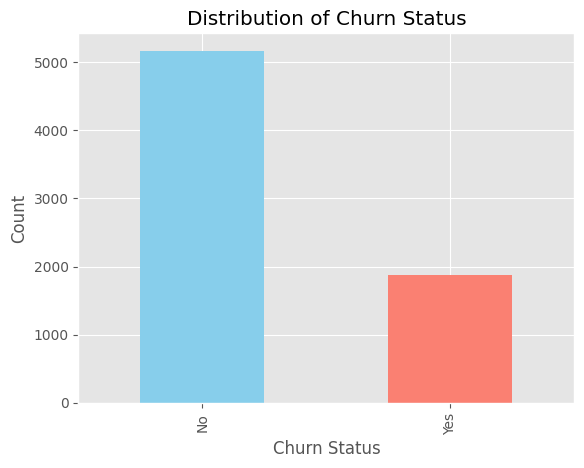

In [17]:
df['churn_status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

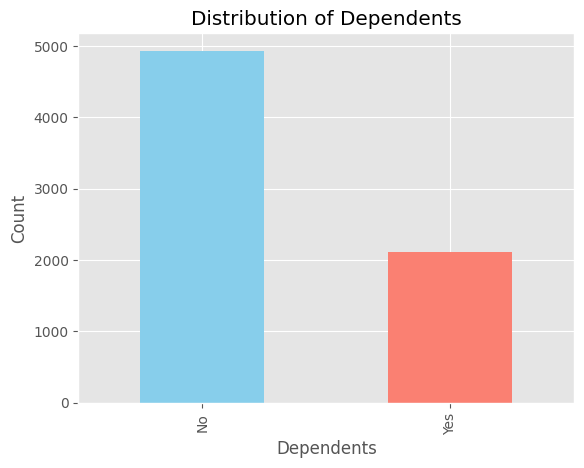

In [18]:
df['dependents'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")

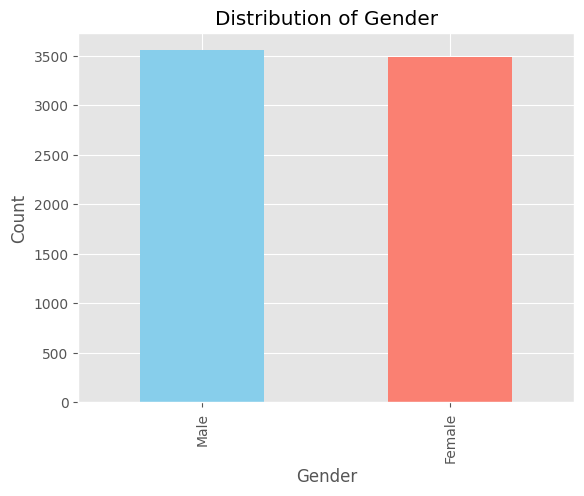

In [19]:
df['gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

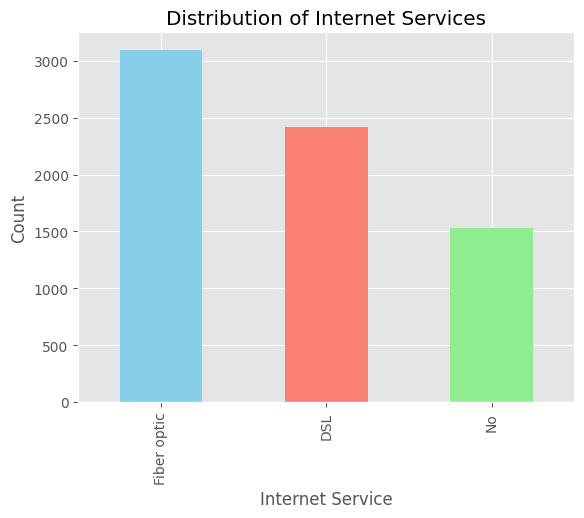

In [20]:
df['internet_service'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Distribution of Internet Services")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.show()

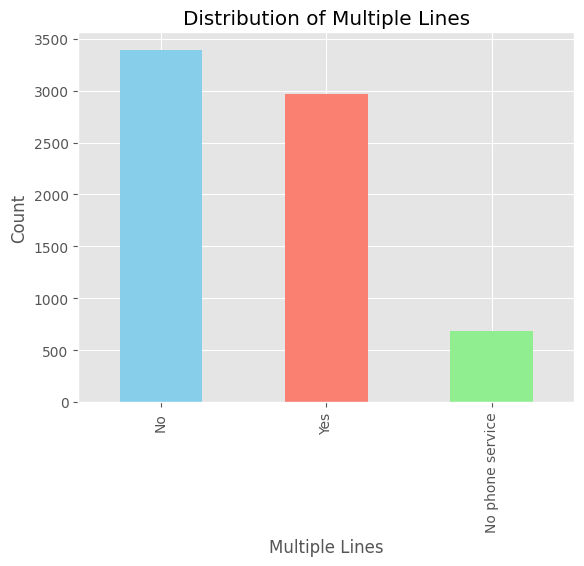

In [21]:
df['multiple_lines'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Distribution of Multiple Lines")
plt.xlabel("Multiple Lines")
plt.ylabel("Count")
plt.show()

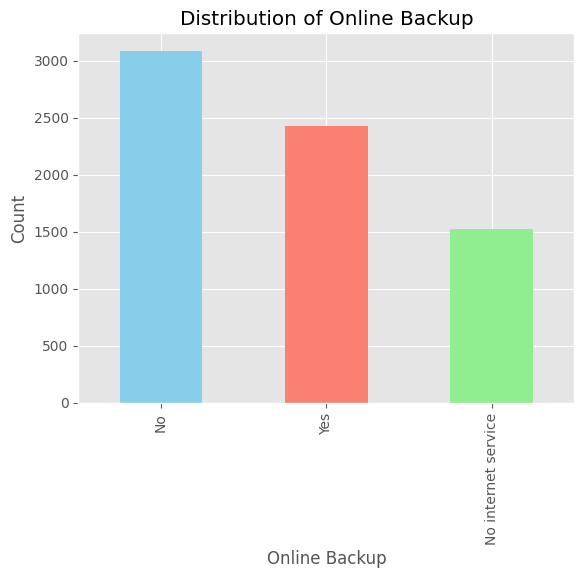

In [22]:
df['online_backup'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Distribution of Online Backup")
plt.xlabel("Online Backup")
plt.ylabel("Count")
plt.show()

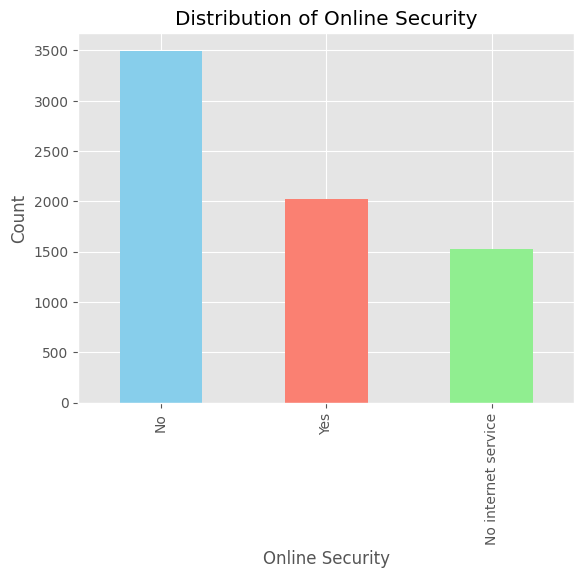

In [23]:
df['online_security'].value_counts().plot(kind='bar', color=['skyblue', 'salmon','lightgreen'])
plt.title("Distribution of Online Security")
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.show()

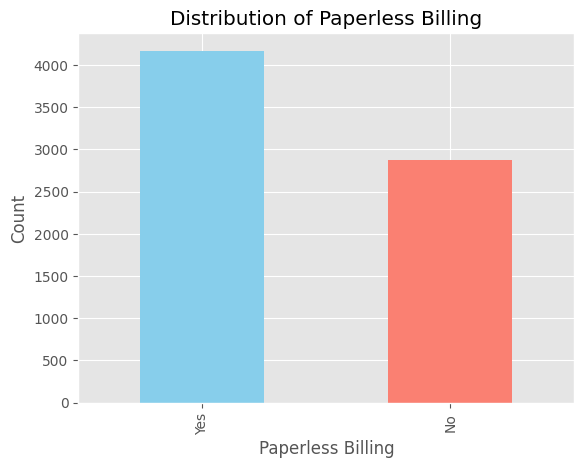

In [24]:
df['paperless_billing'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Paperless Billing")
plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.show()

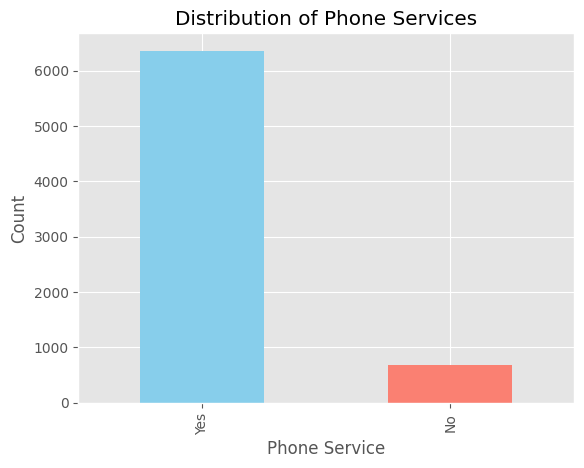

In [25]:
df['phone_service'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Phone Services")
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.show()

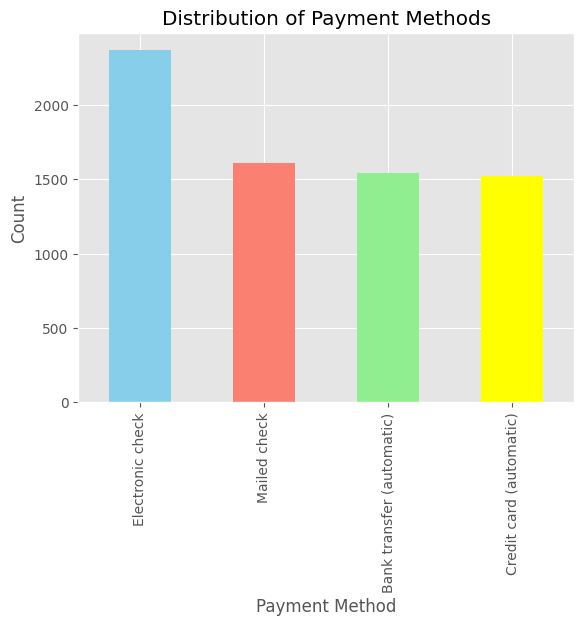

In [26]:
df['payment_method'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'yellow'])
plt.title("Distribution of Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

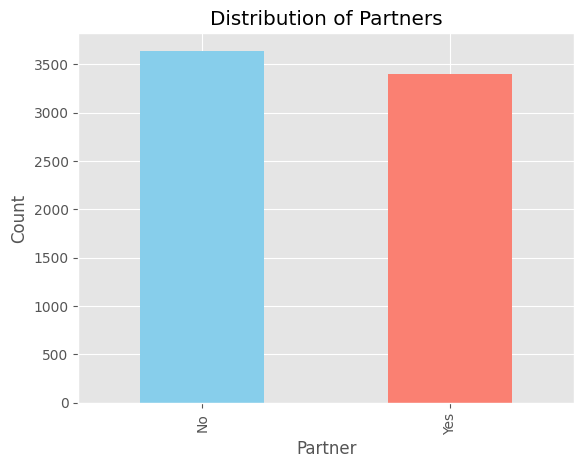

In [27]:
df['partner'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Partners")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.show()

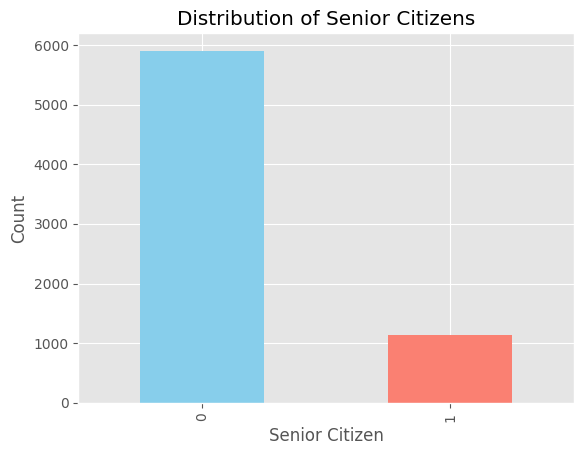

In [28]:
df['senior_citizen'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Senior Citizens")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()

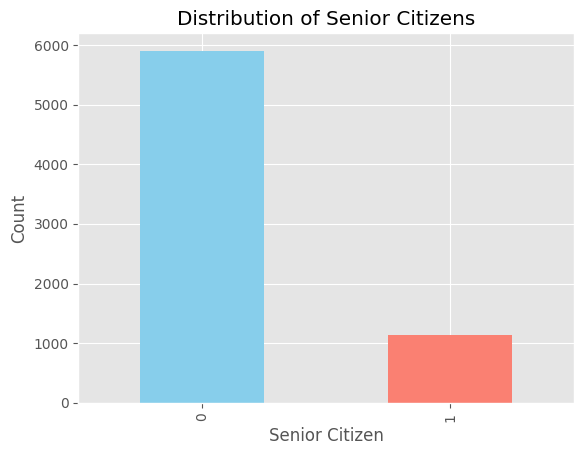

In [29]:
df['senior_citizen'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Senior Citizens")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()

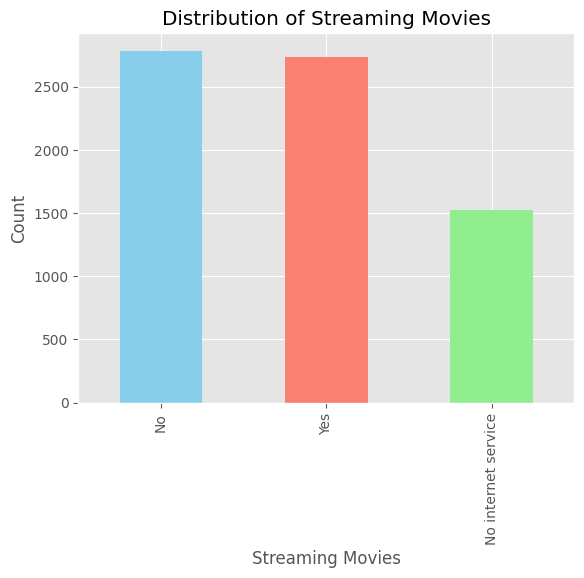

In [30]:
df['streaming_movies'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Distribution of Streaming Movies")
plt.xlabel("Streaming Movies")
plt.ylabel("Count")
plt.show()

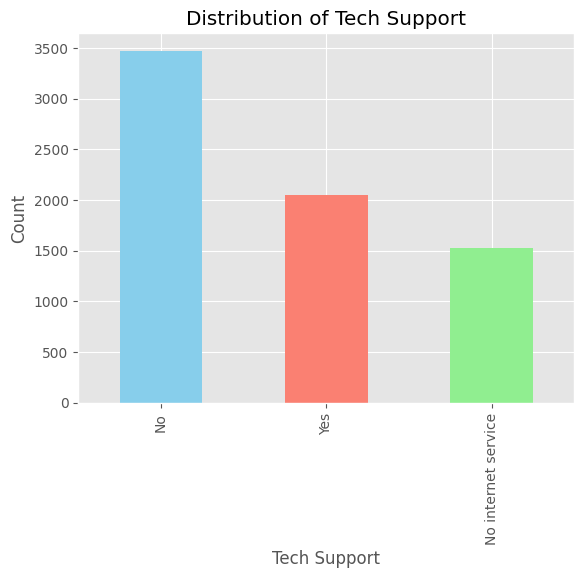

In [31]:
df['tech_support'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Distribution of Tech Support")
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

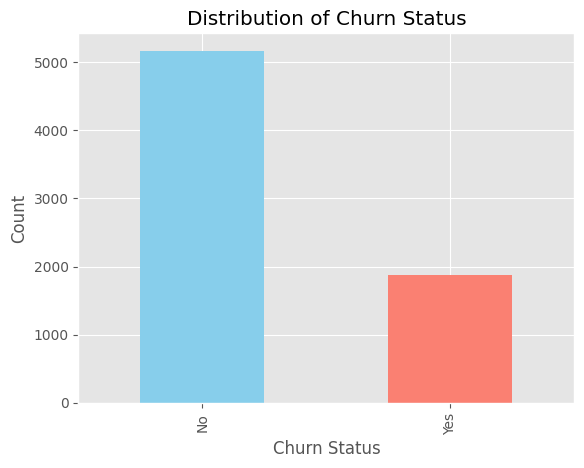

In [32]:
df['churn_status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Count")

<ipython-input-33-06c1e4e3cea6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='total_charges', palette='Set2')


<Axes: xlabel='total_charges'>

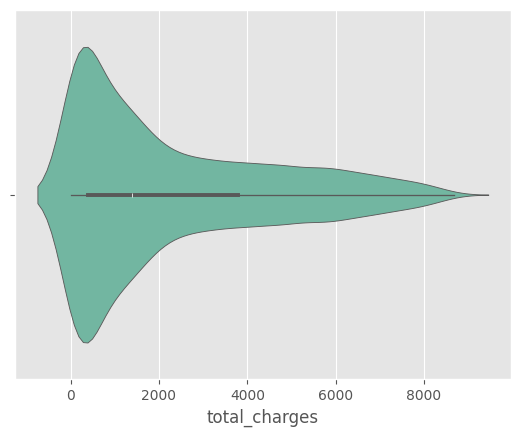

In [33]:
sns.violinplot(data=df, x='total_charges', palette='Set2')

<ipython-input-34-cac541e24da7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='total_charges', palette='Set2')


<Axes: xlabel='total_charges'>

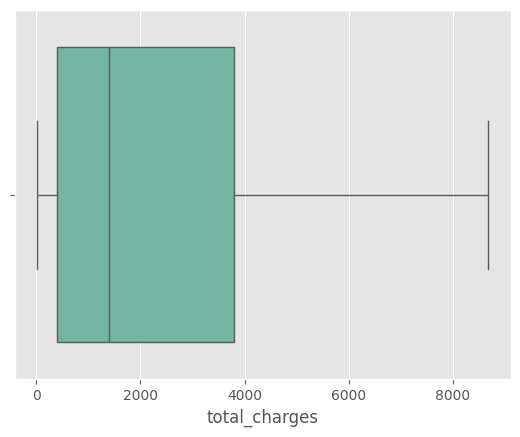

In [34]:
sns.boxplot(data=df, x='total_charges', palette='Set2')

## Bivariate analysis

Text(0, 0.5, 'Density')

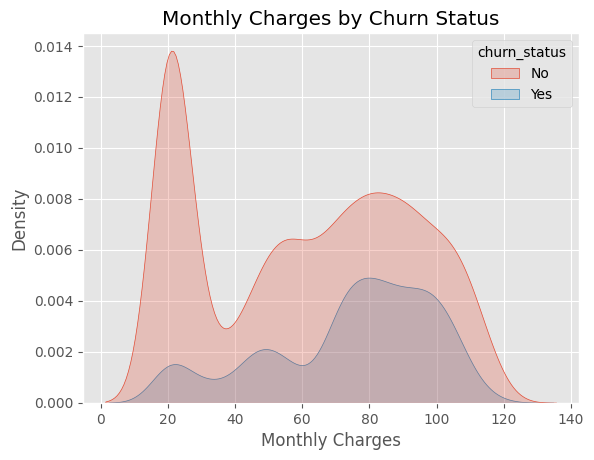

In [35]:
sns.kdeplot(data=df, x='monthly_charges', hue='churn_status', fill=True)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")

Text(0, 0.5, 'Monthly Charges')

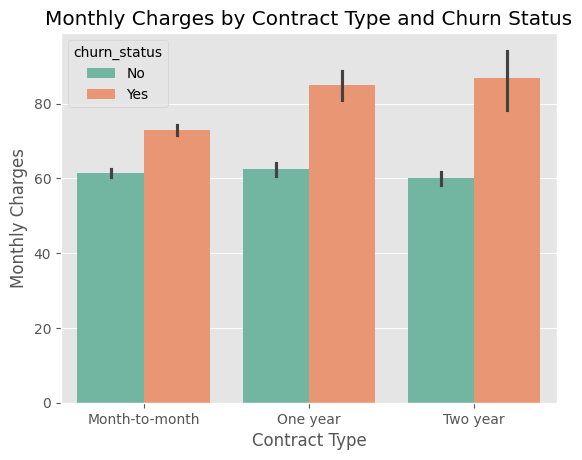

In [36]:
sns.barplot(data=df, x='contract_type', y='monthly_charges', hue='churn_status', palette='Set2')
plt.title("Monthly Charges by Contract Type and Churn Status")
plt.xlabel("Contract Type")
plt.ylabel("Monthly Charges")

Text(0.5, 0, 'Internet Service')

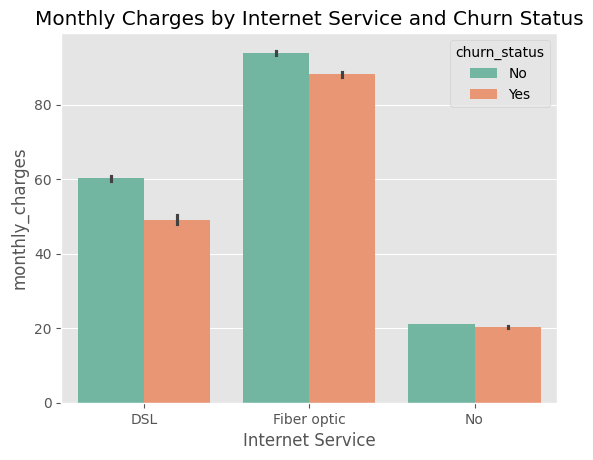

In [37]:
sns.barplot(data=df, x='internet_service', y='monthly_charges', hue='churn_status', palette='Set2')
plt.title("Monthly Charges by Internet Service and Churn Status")
plt.xlabel("Internet Service")

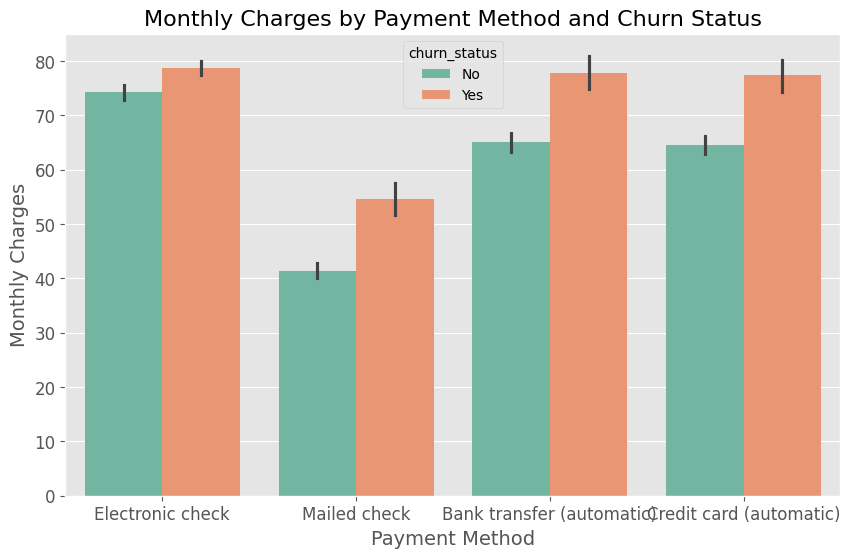

In [53]:
# Set the figure size (optional, adjusts the entire plot dimensions)
plt.figure(figsize=(10, 6))  # Width=10, Height=6 (adjust as needed)

# Create the barplot
sns.barplot(
    data=df,
    x='payment_method',
    y='monthly_charges',
    hue='churn_status',
    palette='Set2'
)

# Customize title and labels with font sizes
plt.title("Monthly Charges by Payment Method and Churn Status", fontsize=16)
plt.xlabel("Payment Method", fontsize=14)  # Increased x-label font size
plt.ylabel("Monthly Charges", fontsize=14)  # Optional: Adjust y-label too
plt.xticks(fontsize=12)  # Increase x-axis tick label size (optional)
plt.yticks(fontsize=12)  # Increase y-axis tick label size (optional)

# Show the plot
plt.show()

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def convert_categorical_to_numeric(df):
    """
    Convert object-type columns to numerical values:
    - Binary (2 categories) → 0/1
    - Ternary (3 categories) → 0/1/2
    - >3 categories → One-hot encoding
    """
    df = df.copy()

    for col in df.select_dtypes(include=['object']).columns:
        unique_values = df[col].nunique()

        # Binary encoding (2 categories)
        if unique_values == 2:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            print(f"Binary encoded '{col}' to 0/1")

        # Ternary encoding (3 categories)
        elif unique_values == 3:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            print(f"Ternary encoded '{col}' to 0/1/2")

        # One-hot encoding (>3 categories)
        else:
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
            print(f"One-hot encoded '{col}' (had {unique_values} categories)")

    return df

# Usage:
df_encoded = convert_categorical_to_numeric(df)

One-hot encoded 'customer_id' (had 7043 categories)
Binary encoded 'gender' to 0/1
Binary encoded 'partner' to 0/1
Binary encoded 'dependents' to 0/1
Binary encoded 'phone_service' to 0/1
Ternary encoded 'multiple_lines' to 0/1/2
Ternary encoded 'internet_service' to 0/1/2
Ternary encoded 'online_security' to 0/1/2
Ternary encoded 'online_backup' to 0/1/2
Ternary encoded 'device_protection' to 0/1/2
Ternary encoded 'tech_support' to 0/1/2
Ternary encoded 'streaming_tv' to 0/1/2
Ternary encoded 'streaming_movies' to 0/1/2
Ternary encoded 'contract_type' to 0/1/2
Binary encoded 'paperless_billing' to 0/1
One-hot encoded 'payment_method' (had 4 categories)
Binary encoded 'churn_status' to 0/1


Text(0, 0.5, 'Count')

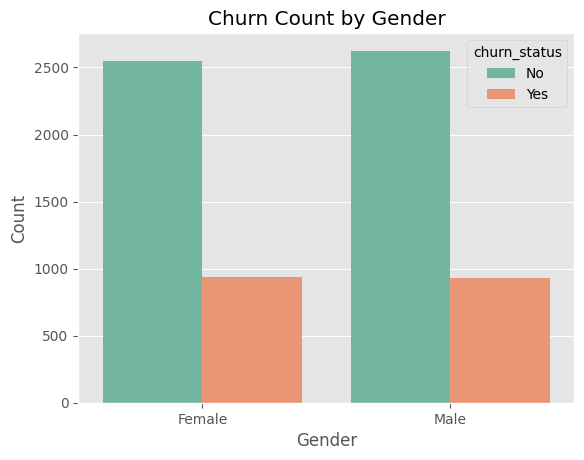

In [40]:
# visuaklize the churn count for both male and female
sns.countplot(data=df, x='gender', hue='churn_status', palette='Set2')
plt.title("Churn Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

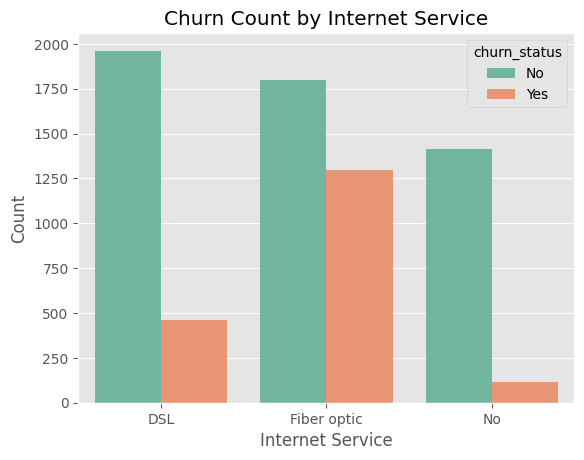

In [41]:
# Churn count for internet_service
sns.countplot(data=df, x='internet_service', hue='churn_status', palette='Set2')
plt.title("Churn Count by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Count")

In [65]:
numerical_columns = ['tenure', 'monthly_charges', 'total_charges']
categorical_columns = ['gender', 'senior_citizen', 'partner', 'dependents',
       'tenure_months', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type',
       'paperless_billing', 'payment_method', 'churn_status']

<ipython-input-66-77c6889481fc>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df.churn_status == 'No'][categorical_columns].hist(bins=20, ax=axes[0])
<ipython-input-66-77c6889481fc>:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df.churn_status == 'Yes'][categorical_columns].hist(bins=20, ax=axes[1])


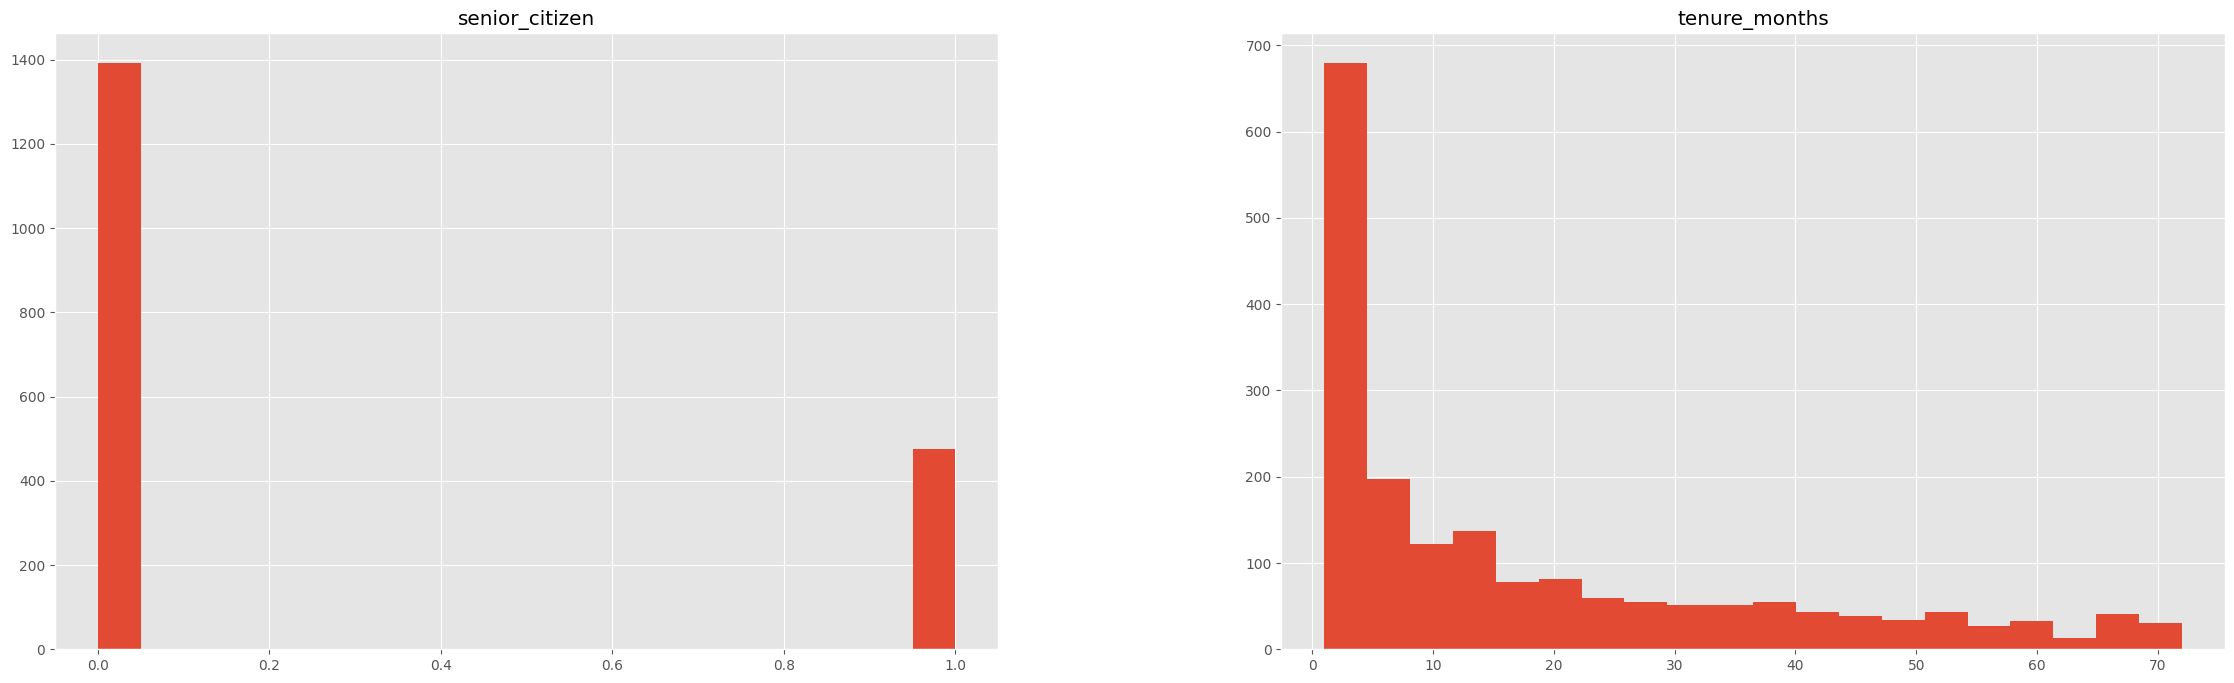

In [66]:
import matplotlib.pyplot as plt

# Create a figure and a 2x1 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(28, 8))

# Access individual subplots using indexing
df[df.churn_status == 'No'][categorical_columns].hist(bins=20, ax=axes[0])
df[df.churn_status == 'Yes'][categorical_columns].hist(bins=20, ax=axes[1])

# Display the plot
plt.show()

# Remove unwanted column

In [67]:
# Remove unwanted column
cleaned_df = df.drop(['customer_id'], axis=1)

In [68]:
cleaned_df.shape

(7032, 20)

In [69]:
# Convert all of the non_numeric columns to numeric
for colum in cleaned_df.columns:
  if cleaned_df[column].dtypes == np.number:
    continue
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

<ipython-input-69-b77606c27eb5>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtypes == np.number:
<ipython-input-69-b77606c27eb5>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtypes == np.number:
<ipython-input-69-b77606c27eb5>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtypes == np.number:
<ipython-input-69-b77606c27eb5>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtypes == np.number:
<ipython-input-69-b77606c27eb5>:3: DeprecationWarning: Converting `np.inexact` o

In [70]:
cleaned_df.dtypes

,0
gender,object
senior_citizen,int64
partner,object
dependents,object
tenure_months,int64
phone_service,object
multiple_lines,object
internet_service,object
online_security,object
online_backup,object


In [72]:
cleaned_df.head()
encode_data = cleaned_df.copy()

In [73]:
encode_data.head()

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn_status
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [76]:
categorical_cols = encode_data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract_type', 'paperless_billing', 'payment_method'],
      dtype='object')


In [77]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity

# Fit & transform categorical columns
ohe_encoded = ohe.fit_transform(encode_data[categorical_cols])

# Get new column names after OHE
ohe_columns = ohe.get_feature_names_out(categorical_cols)

# Convert to DataFrame
ohe_df = pd.DataFrame(ohe_encoded, columns=ohe_columns, index=encode_data.index)

# Drop original categorical columns and concatenate OHE columns
encode_data_ohe = encode_data.drop(categorical_cols, axis=1)
encode_data_ohe = pd.concat([encode_data_ohe, ohe_df], axis=1)

print("Data after OneHotEncoding:")
print(encode_data_ohe.head())

Data after OneHotEncoding:
   senior_citizen  monthly_charges  total_charges  churn_status  \
0             0.0            29.85          29.85           0.0   
1             0.0            56.95        1889.50           0.0   
2             0.0            53.85         108.15           1.0   
3             0.0            42.30        1840.75           0.0   
4             0.0            70.70         151.65           1.0   

   tenure_months_1  tenure_months_2  tenure_months_3  tenure_months_4  \
0              1.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              1.0              0.0              0.0   

   tenure_months_5  tenure_months_6  ...  streaming_movies_nan  \
0              0.0              0.0  ...                   0.0   

In [80]:

# Assuming 'df' is your DataFrame
categorical_cols = encode_data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_cols)

Categorical columns: ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'paperless_billing', 'payment_method']


In [82]:
encode_data_ohe.head()

,senior_citizen,monthly_charges,total_charges,churn_status,tenure_months_1,tenure_months_2,tenure_months_3,tenure_months_4,tenure_months_5,tenure_months_6,...,streaming_movies_nan,contract_type_One year,contract_type_Two year,contract_type_nan,paperless_billing_Yes,paperless_billing_nan,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,payment_method_nan
0,0.0,29.85,29.85,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,56.95,1889.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,53.85,108.15,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,42.30,1840.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,70.70,151.65,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Scaled the data

In [95]:
encode_data_ohe.isna().sum()

,0
senior_citizen,0
monthly_charges,0
total_charges,0
churn_status,0
tenure_months_1,0
...,...
paperless_billing_nan,0
payment_method_Credit card (automatic),0
payment_method_Electronic check,0
payment_method_Mailed check,0


In [97]:
X = encode_data_ohe.drop('churn_status', axis=1)
y = encode_data_ohe['churn_status']

X = StandardScaler().fit_transform(X)

In [98]:
# split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Create the model
model = LogisticRegression()
#Train the model
model.fit(x_train, y_train)

LogisticRegression()

In [100]:
#Create the predictions on the test data
predictions = model.predict(x_test)

#print the predictions
print(predictions)

[1. 0. 0. ... 0. 0. 0.]


In [101]:
# Check the precision, recall, f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1061
         1.0       0.63      0.58      0.60       344

    accuracy                           0.81      1405
   macro avg       0.75      0.73      0.74      1405
weighted avg       0.81      0.81      0.81      1405

